In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Step 2: Load Dataset
df =pd.read_excel("World_development_mesurement.xlsx")

# View data
df.head()


,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
# Step 3: Explore Data
print("Shape of data:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Summary statistics
df.describe()


Shape of data: (2704, 25)

Missing values:
 Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

Data Types:
 Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Busi

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [4]:
# Drop non-numeric columns except for Country (keep it separately)
country_col = df['Country']
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values by imputing with mean
df_numeric = df_numeric.fillna(df_numeric.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

print("Data scaled successfully!")


Data scaled successfully!


In [5]:
# Reduce dimensions for better visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Country'] = country_col

pca_df.head()


,PC1,PC2,Country
0,0.949809,-0.134881,Algeria
1,6.661201,-0.019590,Angola
2,4.404979,-0.092379,Benin
3,3.019830,-0.191810,Botswana
4,5.127557,0.259635,Burkina Faso


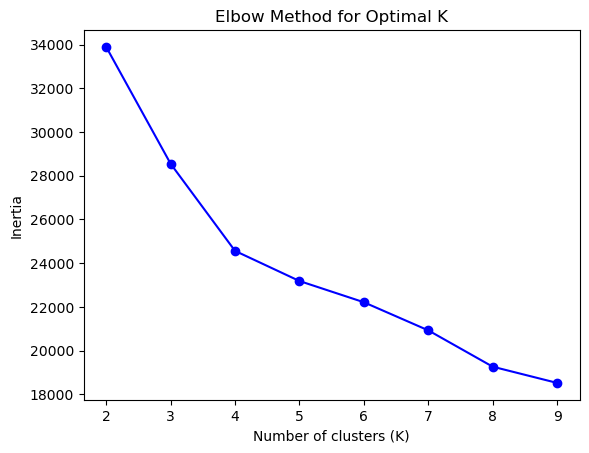

In [6]:
# Step 6: Determine optimal K using Elbow Method
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 7: Apply final K-Means with optimal K
optimal_k = 4   # change based on elbow result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add to dataframe
pca_df['KMeans_Cluster'] = kmeans_labels

#Step 8: Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hier_labels = hierarchical.fit_predict(scaled_data)

pca_df['Hierarchical_Cluster'] = hier_labels

#Step 9: Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

pca_df['DBSCAN_Cluster'] = dbscan_labels


In [7]:
#Step 10: Evaluate Clustering Models
# Only compute silhouette score for non-noise clusters
def get_silhouette(X, labels):
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return np.nan

print("KMeans Silhouette Score:", get_silhouette(scaled_data, kmeans_labels))
print("Hierarchical Silhouette Score:", get_silhouette(scaled_data, hier_labels))
print("DBSCAN Silhouette Score:", get_silhouette(scaled_data, dbscan_labels))


KMeans Silhouette Score: 0.24923024166136262
Hierarchical Silhouette Score: 0.21768732232375929
DBSCAN Silhouette Score: -0.00915562003852421


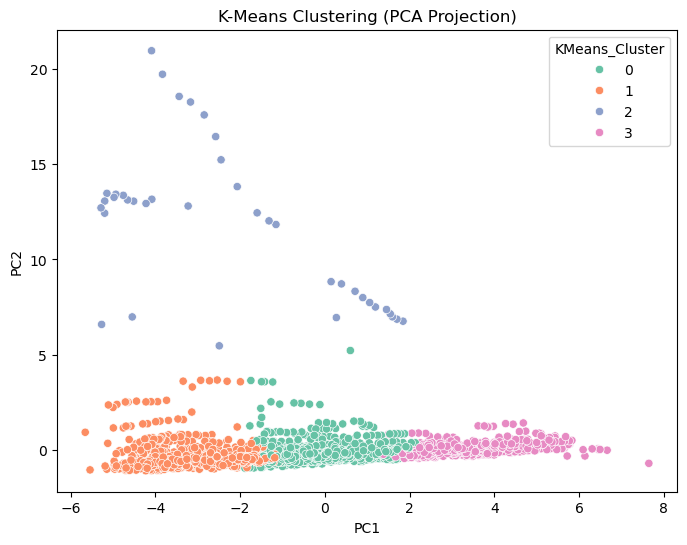

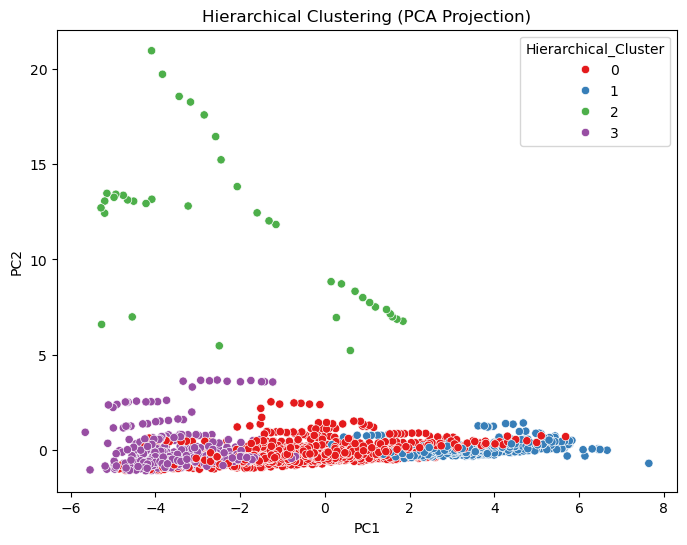

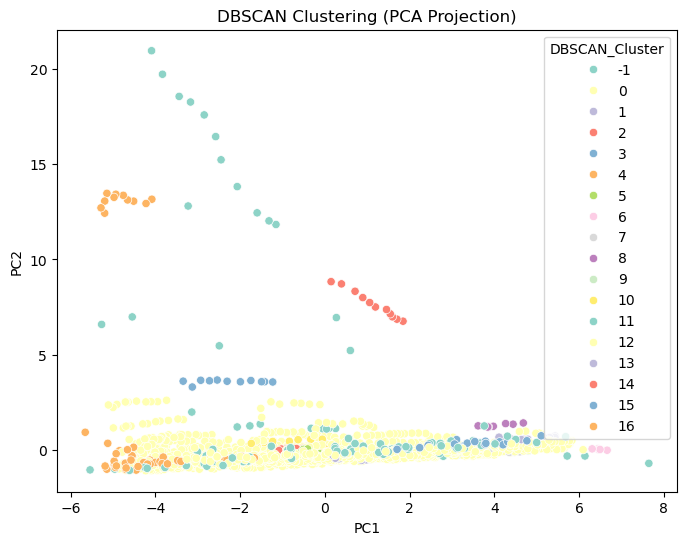

In [8]:
#Step 11: Visualize Clusters
# K-Means visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='Set2')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()

# Hierarchical visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='Set1')
plt.title('Hierarchical Clustering (PCA Projection)')
plt.show()

# DBSCAN visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='Set3')
plt.title('DBSCAN Clustering (PCA Projection)')
plt.show()


In [9]:
# Save PCA and cluster results for Streamlit app
pca_df.to_csv("cluster_results.csv", index=False)
print("Cluster results saved successfully!")


Cluster results saved successfully!
